---
title: 'Lab01: Portugese Bank Marketing Data'
subtitle: "MSDS 7331"
authors: "Anthony Burton-Cordova, Azadeh Hosseinzadeh?, Will Jones, Nick Sager"
date: September 1, 2023
jupyter: python3
---

## Business Understanding

This dataset is from a direct telemarketing campaign of a Portuguese banking institution collected from 2008 to 2013. The goal of the campaign was to get the customer to subscribe to a term deposit. The dataset contains 41188 records and 21 features. The features are the product of feature selection by the original authors [@Moro2014ADA] and include information about the customer, the marketing campaign, and the bank. The dataset is available from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/222/bank+marketing).

The data was collected to aid the researchers in predicting which clients would subscribe to the term deposit offered by the direct marketing campaign. Presumably, this information would be useful to target future marketing campaigns to clients who are more likely to subscribe to the term deposit. This would help the bank to save on marketing costs and get the product to the clients who need it more. The authors of the original paper were able achieve a ROC or 0.80 using a Neural Network Model using 22 features out of the original 150. It is unclear which features have survived in the UCI version of this dataset, but success for us will be defined as approaching or exceeding the original ROC of 0.80.

While this data is now over ten years old, and specific to a Portuguese bank, it is still relevant to the problem of targeted marketing campaigns. We expect the insights gained from this project will generalize to many other business use cases.

## Data Meaning and Type

The data is broken into four categories: Client data, variables related to the last contact of the current campaign, other attributes, and social and economic context attributes. It is a mix of categorical and numeric data, and differs from the base dataset in that Economic data published by the Bank of Portugal is included and average yearly balance is excluded. The authors of the original paper [@Moro2014ADA] found that adding the Socioeconomic data significantly improved the performance of their models, so we have included it in our analysis. Of note, the 'duration' feature is highly correlated with the target variable, but it would not be known until after a call is made. We will keep it in the dataset for comparison purposes, but will not include it in any predictive models. The following description of the data is adopted from the file 'bank-additional-names.txt' included with the dataset.

Bank Client Data:
- Age: Integer value of the client's age. (age: int64)
- Job: Categorical type of job (job: object) 
  - levels: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown' 
- Marital Status: Categorical marital status (marital: object)
  - levels: "married", "divorced", "single"; note: "divorced" means divorced or widowed
- Education: Client highest level of education (education: object)
  - levels: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown'
- Default: Categorical indicating whether the client has credit in default? (default: binary object)
- Housing Loan: Client has housing loan? (housing: binary object)
- Personal Loan: Client has a personal loan? (loan: binary object)

Variables related to the last contact of the current campaign:
- Method of contact: Contact communication type (contact: object)
  - levels: "cellular", "telephone" 
- Month: last contact month of year (month: object)
  - levels: "jan", "feb", "mar", ..., "nov", "dec"
  - **Convert to Integer?**
  - Would be useful if we had current date to find difference (new feature creation)
- Day of Week : last contact day of the week (day_of_week: object)
  - levels: "mon", "tue", "wed", "thu", "fri"
- Duration of last contact: last contact duration, in seconds (duration: Int64). 
  - Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:
- Number of Contacts: number of contacts performed during this campaign and for this client including last contact(campaign: Int64)
- Days Elapsed: number of days that passed by after the client was last contacted from a previous campaign (pdays: Int64)
  - 999 means client was not previously contacted
- Previous Contacts: number of contacts performed before this campaign and for this client (previous: Int64)
- Previous Outcome: outcome of the previous marketing campaign (poutcome: object)
  - levels: "failure","nonexistent","success"
  - **Consider making binary: "success" or "not success"**
  - **Consider making nonexistent NA and handling**

Social and economic context attributes:
- Employment Variation Rate - quarterly indicator (emp.var.rate: float64)
- Consumer Price Index - monthly indicator (cons.price.idx: float64)     
- Consumer Confidence Index - monthly indicator (cons.conf.idx: float64)     
- Euribor 3 month rate - daily indicator (euribor3m: float64)
- Number of Employees - quarterly indicator (nr.employed: float64)

Output variable (desired target):
- Success: Has the client subscribed a term deposit? (y: binary object)

In [8]:
import pandas as pd

# Choose File
# RawBank = "https://raw.githubusercontent.com/NickSager/DS7331_Projects/main/Lab01/data/bank-additional-full.csv"
RawBank = "data/bank-additional-full.csv"

# Read the CSV file with a semicolon ; separator
bank = pd.read_csv(RawBank, sep=';')

# Get info on the dataset
print(bank.info())
bank.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Data Quality

NA values are coded as 'unknown', 'nonexistent', or 999 in the dataset. We will need to convert these to NA in order to determine how many are missing and how to handle them.

In [9]:
import numpy as np

# let's set those values to NaN, so that Pandas understand they are missing
df = bank.copy() # make a copy of the dataframe
df = df.replace(to_replace = 'unknown', value = np.nan) # replace unknown with NaN (not a number)
df = df.replace(to_replace = 999, value = np.nan) # replace 999 with NaN (not a number)
df = df.replace(to_replace = 'nonexistent', value = np.nan) # replace nonexistent with NaN (not a number)

print (df.info())
df.describe() # scroll over to see the values

# From course material "01. Pandas.ibynb"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41186 non-null  float64
 11  campaign        41188 non-null  int64  
 12  pdays           1515 non-null   float64
 13  previous        41188 non-null  int64  
 14  poutcome        5625 non-null   object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41186.000000,41188.000000,1515.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.249041,2.567593,6.014521,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.234158,2.770014,3.824906,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,3.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,6.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,7.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,27.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


With the exception of Days Elapsed and two missing values in Duration, the numerical data is complete. We will change the two entries with 999s duration back to 999s in case they don't represent an entry error. Based on the maximum duration, that value isn't necessarily an outlier. The amount of non-null Days Elapsed values is actually very small (3.7% of total records). This means that the vast majority of cases represent the first call of the current marketing campaign.

Of the categorical values, Previous Outcome, Job, Marital Status, Education, and Default have missing values. There are also roughly 1000 records which have missing values for both housing and personal loan. Previous outcome has the most missing values (13.7% non-null), which is in agreement with our assumption that most of the records represent the first call of the current marketing campaign. 

One can imagine that some clients could have jobs that don't fit into the categories provided. Rather than exclude these records, we will change the NA's back to 'unknown' and treat this as it's own category. We will do the same for Marital Status and Education. For default, housing, and personal loan, we will assume that the missing values indicate that the client does not have a loan or credit in default. We will change the NA's to 'no' for these features, assuming that the presence of any of these is easier to find than the absence.

Previous outcome is a little more difficult to handle. One option would be to change it to a binary variable indicating "success" or "not success". However, success in a previous marketing campaign probably does provide important information about the client. We will change the NA's to "not contacted" and treat it as it's own category. This category will be largely ignored in the analysis, but will be included in predictive models to avoid losing information. NA's in the days elapsed feature will be changed to the mean value of the non-null records.

In [11]:
# Change NA Categoricals to 'unknown'
df['job'] = df['job'].fillna('unknown')
df['marital'] = df['marital'].fillna('unknown')
df['education'] = df['education'].fillna('unknown')

# Change NA Credit history values to 'no'
df['default'] = df['default'].fillna('no')
df['housing'] = df['housing'].fillna('no')
df['loan'] = df['loan'].fillna('no')

# Change NA Previous Outcome to 'not contacted'
df['poutcome'] = df['poutcome'].fillna('not contacted')

# Change NA pdays to the mean
df['pdays'] = df['pdays'].fillna(df['pdays'].mean())

# Change NA Duration to '999'
df['duration'] = df['duration'].fillna(999)

print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  float64
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,6.014521,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,0.733337,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,6.014521,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,6.014521,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,6.014521,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,27.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


There are now 41188 records in the dataset without missing values. The summary statistics appear similar with the exception of days elapsed. We will consider removing this feature later on, as 96% of it represents an imputed value.

## Simple Statistics


In [18]:
#Stats on the data
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,6.014521,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,0.733337,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,6.014521,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,6.014521,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,6.014521,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,27.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


The table above shows summary statistics for the numerical features in the dataset. Most clients are between 20 and 60 years old, and have been contacted 2.5 times during the campaign. Most clients have not been contacted in previous campaigns. The economic features show the range of values during this study, and can be used to gauge the strength of the Portuguese economy at the time of contact. Although duration will not be used for prediction, the mean duration is 258 seconds, or about 4.3 minutes. Interestingly, the standard deviation is 259 seconds, which suggests that a large proportion of clients either didn't answer or hung up very quickly.

In [19]:
# Calculate the percentage of people who subscribed to a term deposit
len(df[df.y == 'yes']) / len(df) * 100.0

11.265417111780131

Of the clients targeted by this campaign, 11.3% subscribed to the term deposit.

In [17]:
df.groupby(by='y').median(numeric_only = True)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,38.0,163.5,2.0,6.014521,0.0,1.1,93.918,-41.8,4.857,5195.8
yes,37.0,449.0,2.0,6.014521,0.0,-1.8,93.200,-40.4,1.266,5099.1


We can see a few differences between the clients who subscribed to the term deposit and those who did not by looking at the median of the numeric variables. The median age of those who subscribed is slightly lower than those who did not. The median duration of phone call was much higher for those who subscribed, although we will exclude this feature in predictive models.

The socioeconomic variables all show differences between the groups, suggesting that economic conditions may be a factor in a client's decision whether to subscribe or not. More analysis is necessary to test whether these differences are significant, but we expect these variables to be important predictors.

In [22]:
# Create a numeric version of the y variable where yes = 1 and no = 0
df['y_num'] = df['y'].map({'yes': 1, 'no': 0})

# Lets aggregate by job and count subscription rates
df_grouped = df.groupby(by='job')
print ('---------------------------------------')
print('Count by Job:')
print (df_grouped.y_num.count())
print ('---------------------------------------')
print('Subscription Rate by Job:')
print (df_grouped.y_num.sum() / df_grouped.y_num.count())

# Adapted from Course material "02. Data Visualization.ipynb"

---------------------------------------
Count by Job:
job
admin.           10422
blue-collar       9254
entrepreneur      1456
housemaid         1060
management        2924
retired           1720
self-employed     1421
services          3969
student            875
technician        6743
unemployed        1014
unknown            330
Name: y_num, dtype: int64
---------------------------------------
Subscription Rate by Job:
job
admin.           0.129726
blue-collar      0.068943
entrepreneur     0.085165
housemaid        0.100000
management       0.112175
retired          0.252326
self-employed    0.104856
services         0.081381
student          0.314286
technician       0.108260
unemployed       0.142012
unknown          0.112121
Name: y_num, dtype: float64


The plurality of jobs are of type 'Admin.' and 'Blue-Collar'. We can see that there are large variations in average subscription rates by job type. Retired people and Students appear much more likely to subscribe, while blue-collar workers are appear less likely.

In [50]:
# let's break up the age variable
df['age_range'] = pd.cut(df.age,[0,40,60,1e6],3,labels=['Young','Middle-Age','Old']) # this creates a new variable
df.age_range.describe()

count     41188
unique        3
top       Young
freq      23768
Name: age_range, dtype: object

In [51]:
# now lets group with the new variable
df_grouped = df.groupby(by=['age_range'])
print ("Percentage of subscribers in each group:")
print (df_grouped.y_num.sum() / df_grouped.y_num.count() *100)

Percentage of subscribers in each group:
age_range
Young         11.448166
Middle-Age     9.115687
Old           45.494505
Name: y_num, dtype: float64


Based on the grouping, it appears that Middle-aged people are the least likely to subscribe and old people are the most likely by a large margin. This suggests that age is a significant factor in whether a client subscribes to the term deposit.

Text(0.5, 1.0, 'Age Range Distribution')

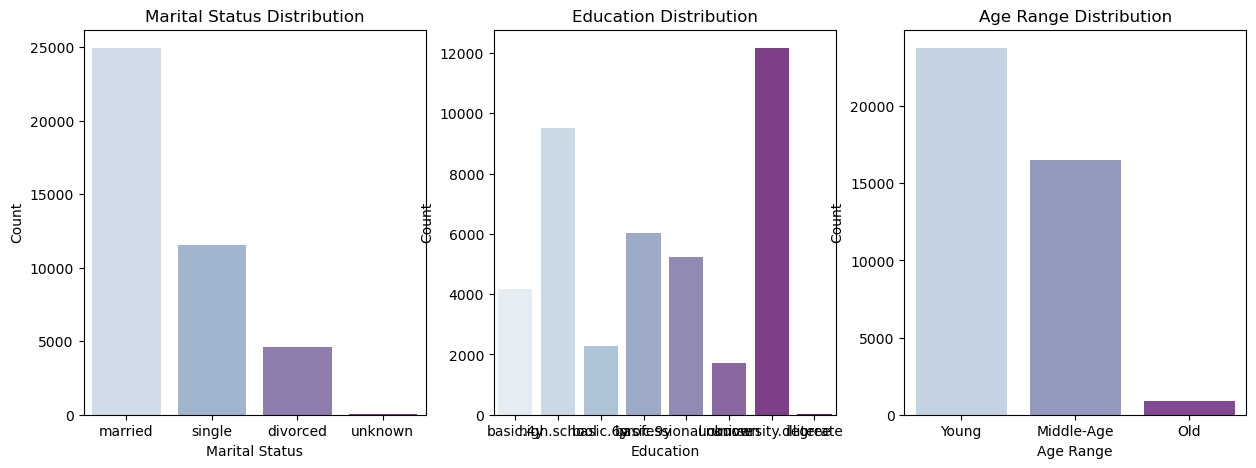

In [52]:
# Visualize proportions of marital status, education, and age range
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
f, axes = plt.subplots(1, 3, figsize=(15, 5))

# Graph Matital Status
sns.countplot(x="marital", data=df, palette="BuPu", ax=axes[0])
axes[0].set_xlabel('Marital Status')
axes[0].set_ylabel('Count')
axes[0].set_title('Marital Status Distribution')

# Graph Education Distribution
sns.countplot(x="education", data=df, palette="BuPu", ax=axes[1])
axes[1].set_xlabel('Education')
axes[1].set_ylabel('Count')
axes[1].set_title('Education Distribution')

# Graph Age Range Distribution
sns.countplot(x="age_range", data=df, palette="BuPu", ax=axes[2])
axes[2].set_xlabel('Age Range')
axes[2].set_ylabel('Count')
axes[2].set_title('Age Range Distribution')

**Write about variables here**  
Possibly include actual percentages of each category

Text(0.5, 1.0, 'Personal Loan Status Distribution')

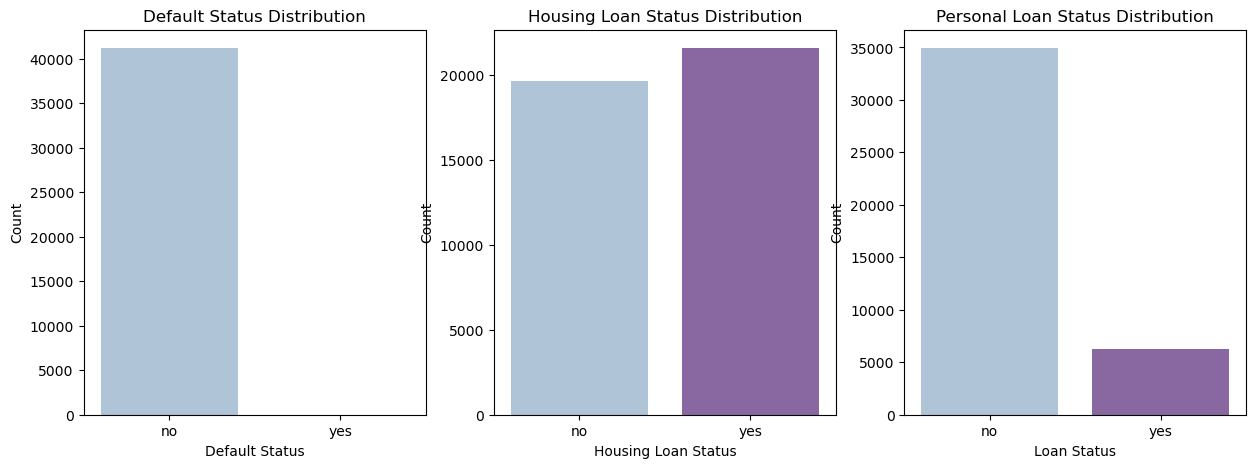

In [54]:
# Visualize proportions of loan status
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
f, axes = plt.subplots(1, 3, figsize=(15, 5))

# Graph Default Distribution
sns.countplot(x="default", data=df, palette="BuPu", ax=axes[0])
axes[0].set_xlabel('Default Status')
axes[0].set_ylabel('Count')
axes[0].set_title('Default Status Distribution')


# Graph Housing Loan Distribution
sns.countplot(x="housing", data=df, palette="BuPu", ax=axes[1])
axes[1].set_xlabel('Housing Loan Status')
axes[1].set_ylabel('Count')
axes[1].set_title('Housing Loan Status Distribution')

# Graph Personal Loan Distribution
sns.countplot(x="loan", data=df, palette="BuPu", ax=axes[2])
axes[2].set_xlabel('Loan Status')
axes[2].set_ylabel('Count')
axes[2].set_title('Personal Loan Status Distribution')

**Write about variables here**  
Possibly include actual percentages of each category

## Visualize Attributes

Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.

## Explore Joint Attributes

Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

## Explore Attributes and Class

Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

## New Features

Are there other features that could be added to the data or created from existing features? Which ones?

**Dummy variables for modelling here.**

## Exceptional Work

PCA Here

## Conclusion

## References

@article{Moro2014ADA,
  title={A data-driven approach to predict the success of bank telemarketing},
  author={S{\'e}rgio Moro and P. Cortez and Paulo Rita},
  journal={Decis. Support Syst.},
  year={2014},
  volume={62},
  pages={22-31},
  url={https://api.semanticscholar.org/CorpusID:14181100}
}